In [3]:
import pandas as pd
import numpy as np

### Carregamento dos dados e informações.

######I# Após multiplas tentativas, precisei deixar apenas alguns jogos pois o csv inteiro é muito grande. Isso ja aconteceu na Fase1 deste projeto.

In [4]:
df = pd.read_csv('./steam_games.csv', encoding='utf-8')
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,CampiÃ£o Games,CampiÃ£o Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosisâ„¢,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSISâ„¢ is a mysterious 2D Platform Puzzler...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       699 non-null    int64  
 1   Name                        699 non-null    object 
 2   Release date                699 non-null    object 
 3   Estimated owners            699 non-null    object 
 4   Peak CCU                    699 non-null    int64  
 5   Required age                699 non-null    int64  
 6   Price                       699 non-null    float64
 7   DLC count                   699 non-null    int64  
 8   About the game              687 non-null    object 
 9   Supported languages         699 non-null    object 
 10  Full audio languages        699 non-null    object 
 11  Reviews                     92 non-null     object 
 12  Header image                699 non-null    object 
 13  Website                     381 non

### Como tem muitos tipos diferentes de dados, preciso do dtypes do Metacritic (primeira questão).

In [6]:
df['Metacritic score'].dtypes

dtype('int64')

In [7]:
df['Release date'].dtypes

dtype('O')

In [8]:
df['Release date'].head()

0    Oct 21, 2008
1    Oct 12, 2017
2    Nov 17, 2021
3    Jul 23, 2020
4     Feb 3, 2020
Name: Release date, dtype: object

##### Pergunta1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? EM caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (mais velho para mais recente).

In [9]:
# Ordenar e selecionar os 10 jogos com maior Metacritic score
top_10 = df.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True]).head(10)

top_10[['Name', 'Metacritic score', 'Release date']]

,Name,Metacritic score,Release date
136,Call of Duty® 4: Modern Warfare®,92,"Nov 12, 2007"
66,Max Payne,89,"Jan 6, 2011"
119,Ragnarock,87,"Jul 15, 2021"
521,Mini Motorways,87,"Jul 20, 2021"
659,Super Meat Boy,87,"Nov 30, 2010"
96,Oxygen Not Included,86,"Jul 30, 2019"
638,Rakuen,84,"May 10, 2017"
44,Reigns: Game of Thrones,84,"Oct 18, 2018"
249,Xpand Rally,82,"Aug 24, 2006"
187,The Legend of Heroes: Trails of Cold Steel II,81,"Feb 14, 2018"


#### Pergunta2: Para jogos de role-playing, qual o número médio e máximo de DLCs, avaliaçõespositivas, avaliações negativas e materiais de demonstração (numero de capturas e filmes somados)?

In [10]:
df['Genres'].head()

0                Casual,Indie,Sports
1                       Action,Indie
2    Action,Adventure,Indie,Strategy
3             Adventure,Casual,Indie
4                    Adventure,Indie
Name: Genres, dtype: object

#### Jogos role-play normalmente são os RPGs e MMORPG.

In [11]:
# Verificar quantos jogos contêm 'RPG' ou 'MMORPG'
count_rpg_mmorpg = df['Genres'].str.contains('RPG|MMORPG', case=False, na=False).sum()

print(f"Número de jogos RPG e MMORPG detectados: {count_rpg_mmorpg}")

Número de jogos RPG e MMORPG detectados: 113


#### Utilizando os métodos mean e max para obter a resposta sobre a média e máximo de DLCs e avaliações positivas e negativas.

In [12]:
# Filtrar jogos com os gêneros 'RPG' ou 'MMORPG'
filtered_df = df[df['Genres'].str.contains('RPG|MMORPG', case=False, na=False)]


In [13]:
# Excluir NaN ou valores vazios nas colunas de interesse antes de calcular
filtered_df_dados = filtered_df[filtered_df['DLC count'].notna() & 
                                  filtered_df['Positive'].notna() & 
                                  filtered_df['Negative'].notna()]

mean_dlcs = filtered_df_dados['DLC count'].mean()
max_dlcs = filtered_df_dados['DLC count'].max()
mean_pos = filtered_df_dados['Positive'].mean()
max_pos = filtered_df_dados['Positive'].max()
mean_neg = filtered_df_dados['Negative'].mean()
max_neg = filtered_df_dados['Negative'].max()

print(f"Média de DLCs: {mean_dlcs:.2f}")
print(f"Número máximo de DLCs: {max_dlcs:.2f}")
print(f"Média de Avaliações Positivas: {mean_pos:.2f}")
print(f"Número máximo de Avaliações Positivas: {max_pos:.2f}")
print(f"Média de Avaliações Negativas: {mean_neg:.2f}")
print(f"Número máximo de Avaliações Negativas: {max_neg:.2f}")

Média de DLCs: 0.39
Número máximo de DLCs: 13.00
Média de Avaliações Positivas: 423.66
Número máximo de Avaliações Positivas: 19370.00
Média de Avaliações Negativas: 104.63
Número máximo de Avaliações Negativas: 5757.00


In [14]:
df['Screenshots'].head()

0    https://cdn.akamai.steamstatic.com/steam/apps/...
1    https://cdn.akamai.steamstatic.com/steam/apps/...
2    https://cdn.akamai.steamstatic.com/steam/apps/...
3    https://cdn.akamai.steamstatic.com/steam/apps/...
4    https://cdn.akamai.steamstatic.com/steam/apps/...
Name: Screenshots, dtype: object

#### Tive problemas com a coluna Movies, pois estava com muito espaço em branco. Tentei de diversas formas retirar essa tabulação  col.str.replace('\t', ' ',), mas não funcionou. Acabei fazendo isso manualmente.

In [15]:
df['Movies'].head()

0    http://cdn.akamai.steamstatic.com/steam/apps/2...
1    http://cdn.akamai.steamstatic.com/steam/apps/2...
2    http://cdn.akamai.steamstatic.com/steam/apps/2...
3    http://cdn.akamai.steamstatic.com/steam/apps/2...
4    http://cdn.akamai.steamstatic.com/steam/apps/2...
Name: Movies, dtype: object

#### Inicialmente tentei filtrar as colunas e diretamente mas obtive aviso SettingWithCopyWarning. Pra tentar resolver criei .copy() para criar um novo DataFrame independente do original.

In [16]:
# Filtrar e criar uma cópia explícita do DataFrame
filtered_df = df[df['Genres'].str.contains('RPG|MMORPG', case=False, na=False)].copy()

filtered_df['Screenshots'] = filtered_df['Screenshots'].fillna('').astype(str)
filtered_df['Movies'] = filtered_df['Movies'].fillna('').astype(str)

filtered_df['Screenshots_count'] = filtered_df['Screenshots'].str.split(',').apply(len)
filtered_df['Movies_count'] = filtered_df['Movies'].str.split(',').apply(len)

# Criar a nova coluna
filtered_df['Demonstração'] = filtered_df['Screenshots_count'] + filtered_df['Movies_count']

filtered_df[['Name','Genres', 'Screenshots', 'Movies', 'Demonstração']]

,Name,Genres,Screenshots,Movies,Demonstração
5,Wartune Reborn,"Adventure,Casual,Free to Play,Massively Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,13
8,MazM: Jekyll and Hyde,"Adventure,RPG,Simulation,Strategy",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6
10,WARSAW,"Indie,RPG",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10
14,Diary of Lucie,"Action,Adventure,Indie,RPG,Strategy,Early Access",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,13
17,Hero of the Kingdom II,"Adventure,Casual,Indie,RPG",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10
...,...,...,...,...,...
652,火柴人联盟2,"Action,Adventure,Free to Play,Massively Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6
671,Dungeons and Dinners,"Adventure,Casual,Indie,RPG,Strategy,Early Access",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6
683,יום פתוח (Open Day),"Adventure,Indie,RPG",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,22
694,The Advisor - Episode 1: Royal Pain,"Adventure,RPG,Simulation",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6


In [17]:
mean_demo = filtered_df['Demonstração'].mean()
max_demo = filtered_df['Demonstração'].max()


print(f"Média de Demonstrações: {mean_demo:.2f}")
print(f"Número máximo de Demonstrações: {max_demo:.2f}")

Média de Demonstrações: 11.78
Número máximo de Demonstrações: 68.00


#### Pergunta3: Quais são as empresas que mais publicam jogos pagos na plataforma? Para tais, qual o numero médio e mediano de avaliações positivas? 

In [18]:
# Coluna 'Publishers' são as empresas que publicam.
df['Publishers'].head()

0    Perpetual FX Creative
1             Wild Rooster
2           CampiÃ£o Games
3        Odd Critter Games
4            Unusual Games
Name: Publishers, dtype: object

In [19]:
df['Price'].head()

0    19.99
1     0.99
2     4.99
3     5.99
4     0.00
Name: Price, dtype: float64

In [20]:
paid_games=df[df['Price'] > 0]
paid_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,CampiÃ£o Games,CampiÃ£o Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosisâ„¢,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSISâ„¢ is a mysterious 2D Platform Puzzler...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,1,"TD Worlds is a dynamic, highly strategical gam...","['English', 'Russian', 'Danish']",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [21]:
paid_games.shape

(601, 39)

##### Contar as ocorrências de cada publisher e depois filtrar as avaliaões dos jogos.

In [22]:
publisher_counts = paid_games['Publishers'].value_counts()
top_5_publishers = publisher_counts.head(5)

print("Top 5 Publishers que mais publicam jogos pagos: ", top_5_publishers)

Top 5 Publishers que mais publicam jogos pagos:  Publishers
SEGA              4
Big Fish Games    4
HH-Games          3
Sekai Project     3
GameHouse         3
Name: count, dtype: int64


In [23]:
# Jogos dos top 5 publishers
top_5_games = paid_games[paid_games['Publishers'].isin(top_5_publishers.index)]

mean_positive = top_5_games['Positive'].mean()
median_positive = top_5_games['Positive'].median()

print(f"Número médio de avaliações positivas: {mean_positive:.2f}")
print(f"Número mediano de avaliações positivas: {median_positive:.2f}")

Número médio de avaliações positivas: 354.18
Número mediano de avaliações positivas: 31.00


####Pergunta4: O número de jogos que suporta o sistema operacional LINUX cresceu entre 2018 e 2022?

In [24]:
# Jogos com Linux (coluna LINUX = true)
linux_games = df[df['Linux'] == True]['Name'].to_numpy()

print(linux_games[:10])  # Exemplo pra ver se funcionou

['Henosisâ„¢' 'Deadlings: Rotten Edition' 'Royal Battleships'
 'Hero of the Kingdom II' 'Steam Squad' 'Aerofly FS 2 Flight Simulator'
 'Unhappy Ever After' 'Bepuzzled Kittens Jigsaw Puzzle'
 'Vanguard Princess' 'Deadfall Adventures']


#### COmo o numpy so criou um array com os nomes dos jogos, fiz a filtragem novamente. Tambem utilizei o .copy pois deu o mesmo warning de antes. 

In [25]:
# Filtrando os jogos que suportam Linux e criando uma cópia do DataFrame para evitar warning
linux_games_df = df[df['Linux'] == True].copy()


In [26]:
# Datetime do pandas
linux_games_df['Release date'] = pd.to_datetime(linux_games_df['Release date'], errors='coerce')
linux_games_df['year'] = linux_games_df['Release date'].dt.year
games_2018_2022 = linux_games_df[(linux_games_df['year'] >= 2018) & (linux_games_df['year'] <= 2022)]

# Contando o número de jogos por ano
games_per_year = games_2018_2022['year'].value_counts().sort_index()

print(games_per_year)

year
2018    11
2019    16
2020    15
2021    18
2022    13
Name: count, dtype: int64


#######Teve um crescimento dos jogos! Apesar do numero reduzido de jogos por causa co corte nos dados originais da pra perceber que cresceu.

## Graficos

In [27]:
import matplotlib.pyplot as plt

#### G1: Percentual de jogos que possuem suporte para cada sistema operacional.

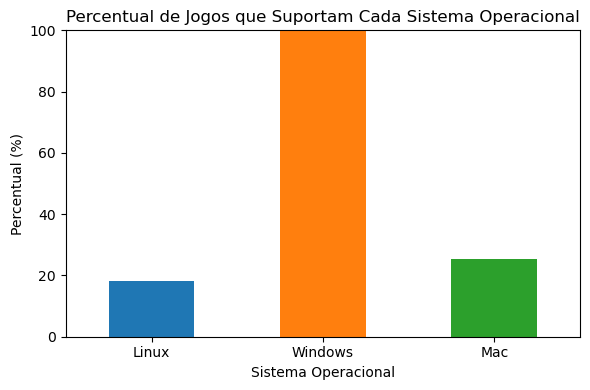

In [44]:
os_counts = df[['Linux', 'Windows', 'Mac']].sum()

os_percentages = (os_counts / len(df)) * 100

# Plotando um gráfico de barras
plt.figure(figsize=(6, 4))
os_percentages.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Percentual de Jogos que Suportam Cada Sistema Operacional')
plt.ylabel('Percentual (%)')
plt.xlabel('Sistema Operacional')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()

plt.show()

#### G2: Numero total de jogos single-player do genero Indie e Estrategia, entre  e 2010 e 2020.

In [30]:
# Convertendo a coluna 'Release date' para datetime e extraindo o ano
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['year'] = df['Release date'].dt.year


In [32]:
df['Categories'].head

<bound method NDFrame.head of 0      Single-player,Multi-player,Steam Achievements,...
1      Single-player,Steam Achievements,Full controll...
2                                          Single-player
3                  Single-player,Full controller support
4                       Single-player,Steam Achievements
                             ...                        
694                Single-player,Full controller support
695    Single-player,Steam Achievements,Full controll...
696    Single-player,Multi-player,PvP,Online PvP,Cros...
697    Single-player,Multi-player,PvP,Shared/Split Sc...
698    Multi-player,PvP,Shared/Split Screen PvP,Share...
Name: Categories, Length: 699, dtype: object>

In [34]:
df['Genres'].head

<bound method NDFrame.head of 0                  Casual,Indie,Sports
1                         Action,Indie
2      Action,Adventure,Indie,Strategy
3               Adventure,Casual,Indie
4                      Adventure,Indie
                    ...               
694           Adventure,RPG,Simulation
695       Adventure,Indie,RPG,Strategy
696          Action,Indie,Early Access
697                Action,Casual,Indie
698                       Action,Indie
Name: Genres, Length: 699, dtype: object>

In [36]:
# Filtrando jogos
single_player_indie = df[(df['Categories'].str.contains('Single-player', case=False, na=False)) &
                         (df['Genres'].str.contains('Indie', case=False, na=False)) &
                         (df['year'] >= 2010) & (df['year'] <= 2020)]

single_player_strategy = df[(df['Categories'].str.contains('Single-player', case=False, na=False)) &
                            (df['Genres'].str.contains('Strategy', case=False, na=False)) &
                            (df['year'] >= 2010) & (df['year'] <= 2020)]

#single_player_indie.head()
#single_player_strategy.head()

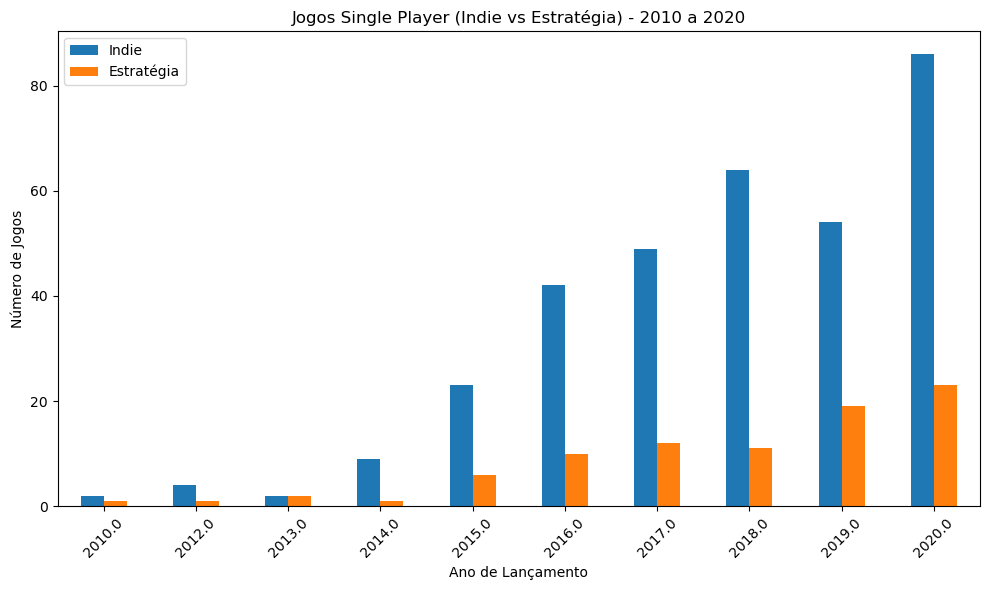

In [45]:
# Contagem
games_indie_per_year = single_player_indie['year'].value_counts().sort_index()
games_strategy_per_year = single_player_strategy['year'].value_counts().sort_index()

games_per_year_df = pd.DataFrame({
    'Indie': games_indie_per_year,
    'Estratégia': games_strategy_per_year
}).fillna(0)

# Plotando o gráfico de barras agrupadas
ax = games_per_year_df.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Jogos Single Player (Indie vs Estratégia) - 2010 a 2020')
plt.ylabel('Número de Jogos')
plt.xlabel('Ano de Lançamento')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Pergunta e Grafico extra!
Porcentagem de jogos que possuem o idioma Portugues, comparando com Ingles (lingua universal e notadamente a preferencial).

In [48]:
df['Supported languages'].head

<bound method NDFrame.head of 0                                            ['English']
1      ['English', 'French', 'Italian', 'German', 'Sp...
2                     ['English', 'Portuguese - Brazil']
3      ['English', 'French', 'Italian', 'German', 'Sp...
4                         ['English', 'Spanish - Spain']
                             ...                        
694                                          ['English']
695                                          ['English']
696                                          ['English']
697                                          ['English']
698                                          ['English']
Name: Supported languages, Length: 699, dtype: object>

In [54]:
total_games = len(df)
languageP_count = df['Supported languages'].str.contains('Portuguese - Brazil', na=False).sum()
languageE_count = df['Supported languages'].str.contains('English', na=False).sum()

languageP_percent = (languageP_count / total_games) * 100
languageE_percent = (languageE_count / total_games) * 100
print(f"Percentual de jogos com suporte a Português do Brasil: {languageP_percent:.2f}%")
print(f"Percentual de jogos com suporte a Inglês: {languageE_percent:.2f}%")


Percentual de jogos com suporte a Português do Brasil: 12.73%
Percentual de jogos com suporte a Inglês: 94.28%


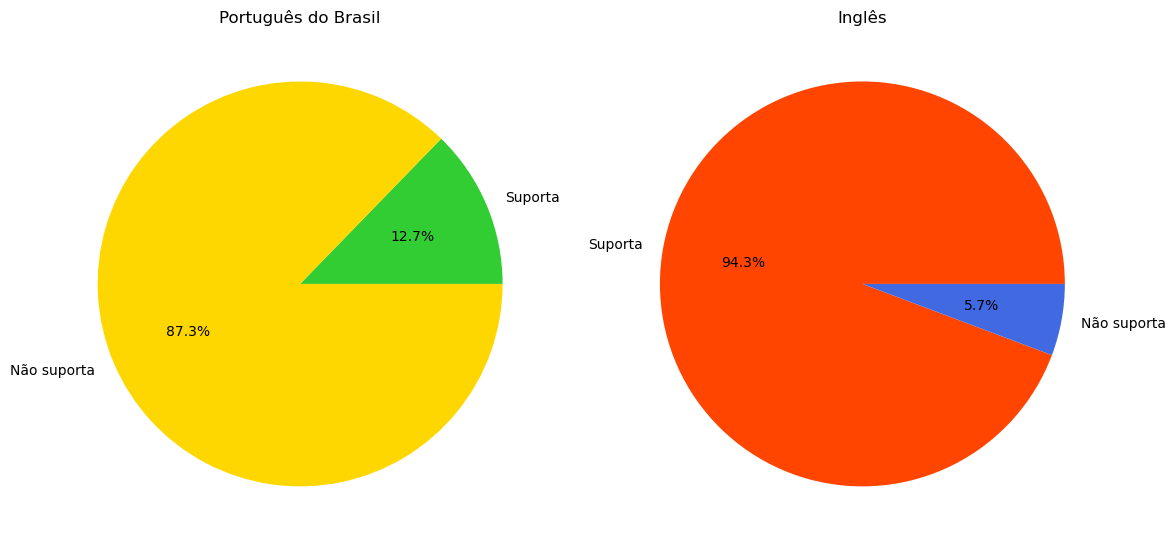

In [ ]:
labels = ['Suporta', 'Não suporta']
portuguese_data = [languageP_percent, 100 - languageP_percent]
english_data = [languageE_percent, 100 - languageE_percent]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para Português
axes[0].pie(portuguese_data, labels=labels, autopct='%1.1f%%', colors=['#32CD32', '#FFD700'])
axes[0].set_title('Português do Brasil')

# Gráfico para Inglês
axes[1].pie(english_data, labels=labels, autopct='%1.1f%%', colors=['#FF4500', '#4169E1'])
axes[1].set_title('Inglês')

plt.tight_layout()
plt.show()